In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'Task1 Dataset.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print()

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())
print()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  5 non-null      int64 
 1   Gender                   5 non-null      object
 2   Age                      5 non-null      int64 
 3   Activity Level           5 non-null      object
 4   Location                 5 non-null      object
 5   App Sessions             5 non-null      int64 
 6   Distance Travelled (km)  5 non-null      int64 
 7   Calories Burned          5 non-null      int64 
dtypes: int64(5), object(3)
memory usage: 448.0+ bytes
None

First few rows of the dataset:
   User ID  Gender  Age Activity Level  Location  App Sessions  \
0        1    Male   30         Active     Urban           100   
1        2  Female   25       Moderate     Rural            50   
2        3    Male   40      Sedentary  Suburban           

Correlation Matrix:


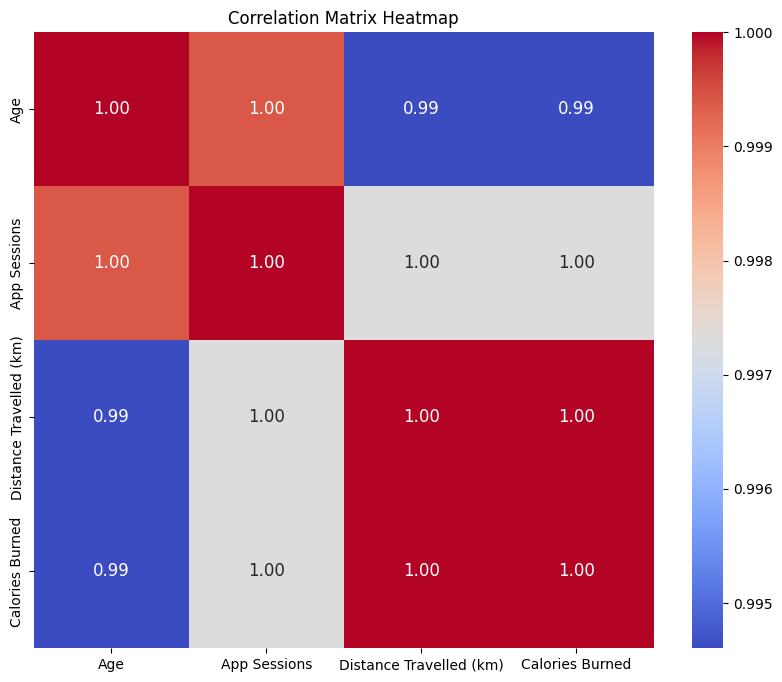

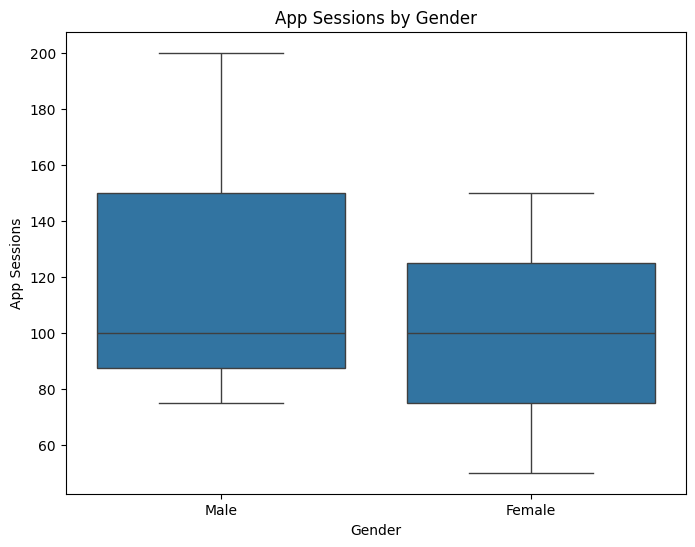

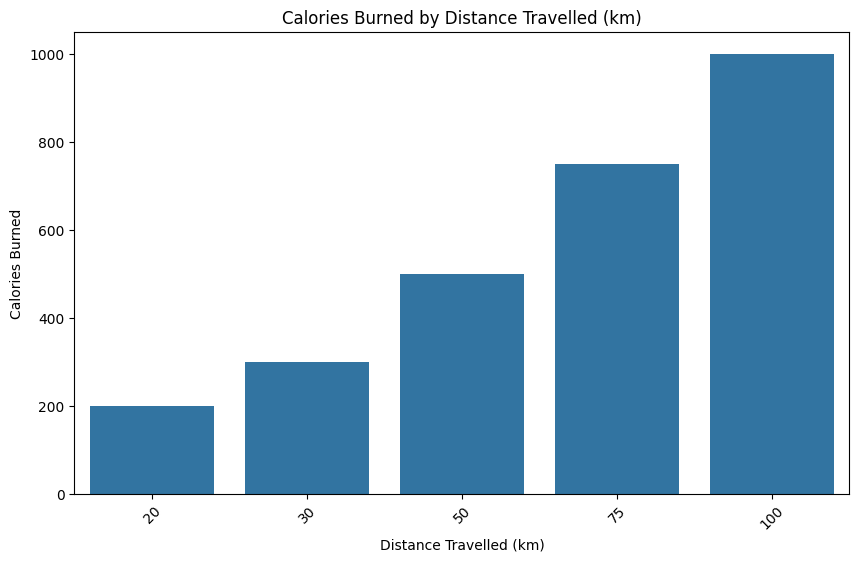

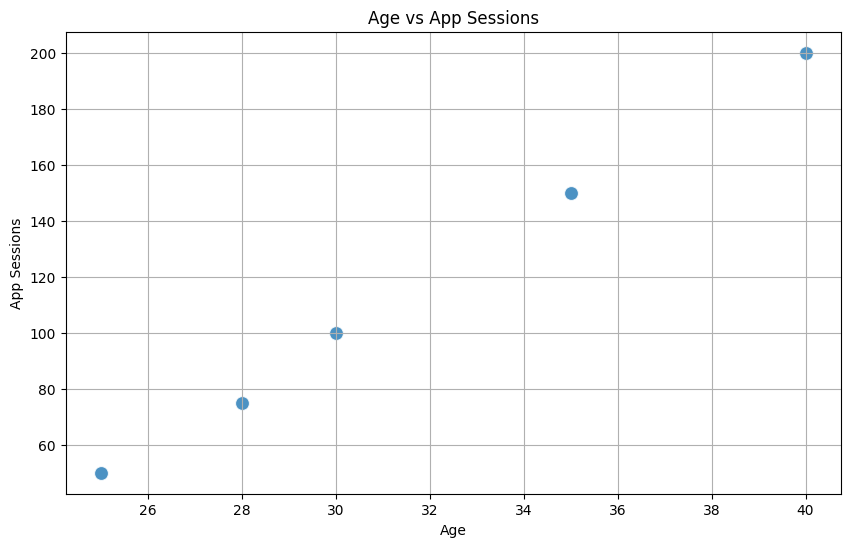

In [10]:
# Calculate correlation matrix
correlation_matrix = df[['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']].corr()

print("Correlation Matrix:")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix Heatmap')
plt.show()

print()

# Box plot for App Sessions by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='App Sessions', data=df)
plt.title('App Sessions by Gender')
plt.show()

# Bar plot for Calories Burned by Distance Travelled (km)
plt.figure(figsize=(10, 6))
sns.barplot(x='Distance Travelled (km)', y='Calories Burned', data=df, errorbar=None)
plt.title('Calories Burned by Distance Travelled (km)')
plt.xlabel('Distance Travelled (km)')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of Age vs App Sessions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='App Sessions', data=df, s=100, alpha=0.8)
plt.title('Age vs App Sessions')
plt.xlabel('Age')
plt.ylabel('App Sessions')
plt.grid(True)
plt.show()

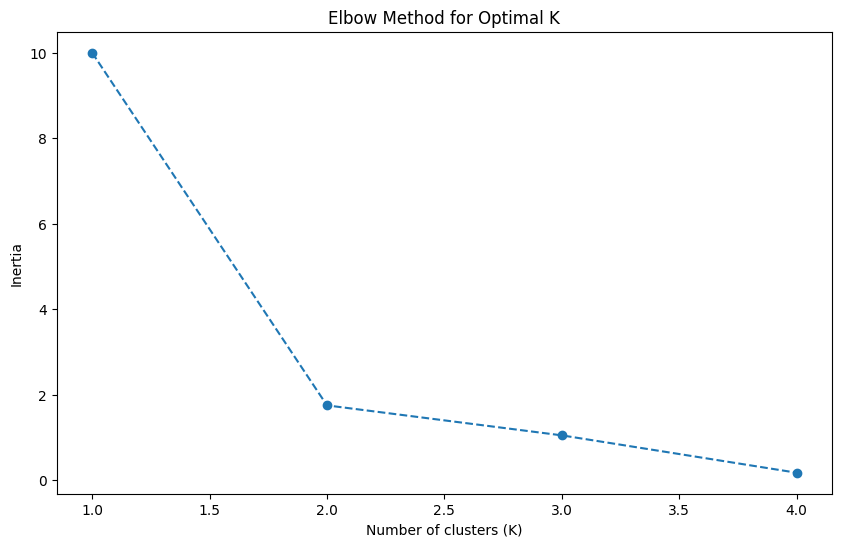

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = df[['App Sessions', 'Age']]

# Standardize the data (important for K-means clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Finding the optimal number of clusters (K) using the Elbow Method
inertia = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


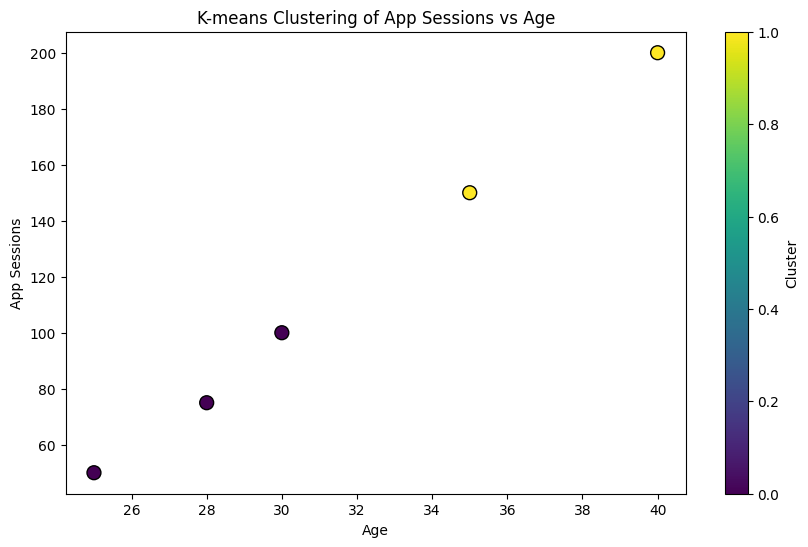

In [4]:
# Applying K-means clustering with the chosen K
k = 2  # Example: Choose the number of clusters based on the Elbow Method
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['App Sessions'], c=df['Cluster'], cmap='viridis', edgecolors='k', s=100)
plt.title('K-means Clustering of App Sessions vs Age')
plt.xlabel('Age')
plt.ylabel('App Sessions')
plt.colorbar(label='Cluster')
plt.show()

Mean Squared Error: 12.50
R-squared: 0.92


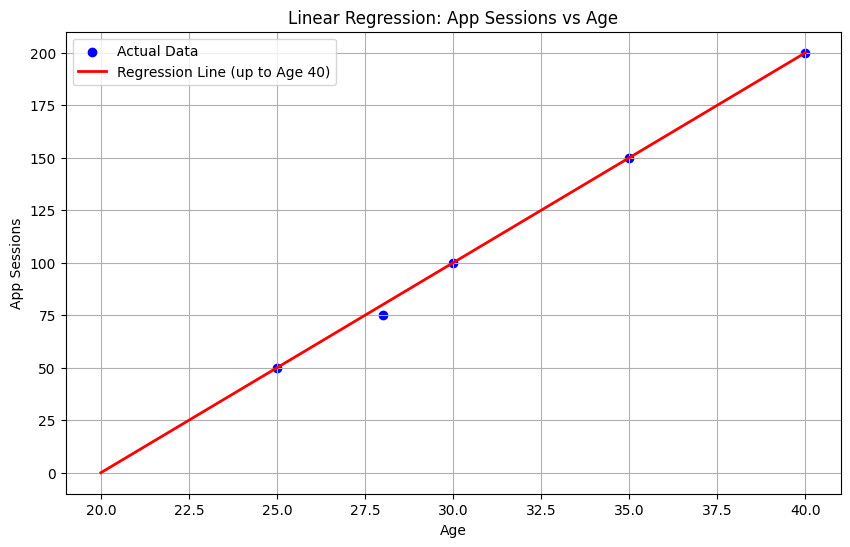

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df[['Age']].values  
y = df['App Sessions'].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

# Extend the range of ages to include up to 40
X_range = np.arange(20, 41).reshape(-1, 1)  # Create an array from 20 to 40

# Predict App Sessions for the extended range
y_range_pred = model.predict(X_range)

# Plotting the regression line including the extended range
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Regression Line (up to Age 40)')
plt.title('Linear Regression: App Sessions vs Age')
plt.xlabel('Age')
plt.ylabel('App Sessions')
plt.legend()
plt.grid(True)
plt.show()